In [6]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
import pandas as pd
from os import listdir
from os.path import isfile, join

In [8]:
results_path = 'C:\\Users\\Луиза\\Desktop\\MLDM\\ALGO\\Project\\run_results'

file_list = [f for f in listdir(results_path) if isfile(join(results_path, f))]

frames = []
for file_name in file_list:
    if file_name.endswith('_12.csv'):
        splitted_name = file_name.split('_')
        df = pd.read_csv(results_path+'/'+file_name)
        df['alphabet_len'] = len(splitted_name[1])
        df['test_type'] = splitted_name[2]
        frames.append(df)
results = pd.concat(frames)
results = results[['algorithm','alphabet_len','test_type','len','clock_time','ed','calls']]

results.head()

,algorithm,alphabet_len,test_type,len,clock_time,ed,calls
0,divide_and_conquer,22,atmost20,1,0.000015,0.0,1
1,dinamic_programming,22,atmost20,1,0.000054,0.0,1
2,dinamic_programming_2,22,atmost20,1,0.000097,0.0,1
3,greedy_approach,22,atmost20,1,0.000061,0.0,1
4,branch_and_bound_len,22,atmost20,1,0.000013,0.0,2


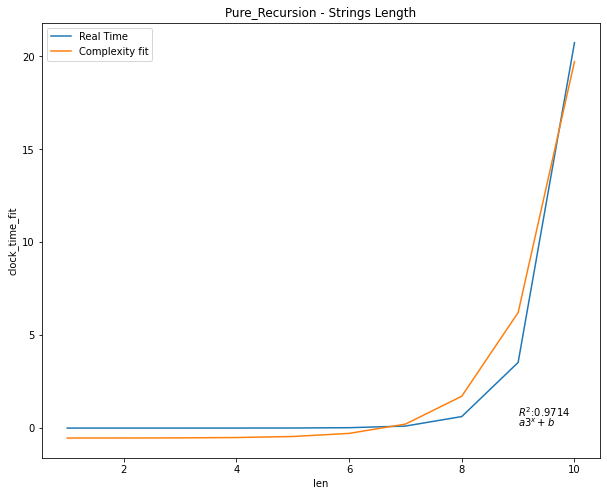

In [15]:
fig, ax = plt.subplots(ncols=1,figsize=(10,8))

graph_data = results[(results['alphabet_len'] == 52) & (results['algorithm'] == 'pure_recursion') & (results['test_type'] == 'randompair')]
graph_data = graph_data.groupby(['algorithm','alphabet_len','len']).mean().reset_index()

#Experimiental fit to complexity
fit = np.polyfit(graph_data['len'].apply(lambda x: 3**x), graph_data['clock_time'],1)    
graph_data['clock_time_fit'] = graph_data['len'].apply(lambda x: fit[0]*3**x+fit[1])

r_square = r2_score(graph_data['clock_time'], graph_data['clock_time_fit'])
ax.set_title('Pure_Recursion - Strings Length')

ax.set_ylabel('Time')
ax.set_xlabel('String Length')
ax.text(9,0.05,'$a3^x+b$')
ax.text(9,0.6,'$R^2$:'+str('{:.4f}'.format(r_square)))

g = sns.lineplot(data = graph_data, x='len', y='clock_time', ax = ax, label='Real Time')
g = sns.lineplot(data = graph_data, x='len', y='clock_time_fit', ax = ax, label='Complexity fit')

plt.show()